In [1]:
print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
import numpy as np
import wave as wv
import matplotlib.pyplot as plt
from scipy import signal
import scipy.io.wavfile
from sklearn.decomposition import FastICA

# Get samples from wav files

4069.5633891


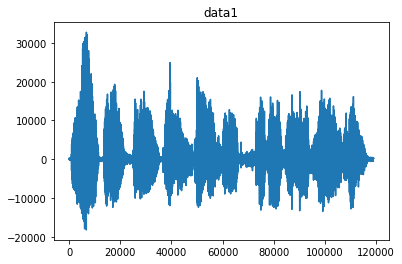

3195.77398914


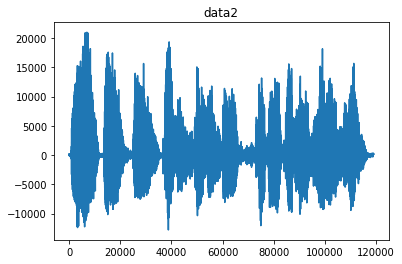

In [5]:
sourceFilesPrefix="AudioSources\\fullSample-"
resultFilesPrefix="AudioResults\\fullSample-"
rate1, sample1_data = scipy.io.wavfile.read(sourceFilesPrefix+"1.wav")
print(sample1_data.std(axis=0))
plt.figure(1)
plt.plot(sample1_data)
plt.title("data1")
plt.show()

rate2, sample2_data=scipy.io.wavfile.read(sourceFilesPrefix+"2.wav")
print(sample2_data.std(axis=0))
plt.figure(2)
plt.plot(sample2_data)
plt.title("data2")
plt.show()

In [6]:
S=np.c_[sample1_data,sample2_data]
print(S)
median=S.std(axis=0)
print(median)
S= S/median

print(S)

[[148 159]
 [175 141]
 [193 159]
 ..., 
 [258 123]
 [258 104]
 [294 123]]
[ 4069.5633891   3195.77398914]
[[ 0.03636754  0.04975321]
 [ 0.04300216  0.04412077]
 [ 0.04742523  0.04975321]
 ..., 
 [ 0.06339746  0.03848833]
 [ 0.06339746  0.03254298]
 [ 0.07224362  0.03848833]]


In [8]:
ica = FastICA(n_components=2)
S_=ica.fit_transform(S)
A_=ica.mixing_
M_=ica.mean_
print(A_)
print(M_)

[[ 315.84744461 -138.70973915]
 [ 326.26116297  112.04308787]]
[-0.00012319 -0.00015666]


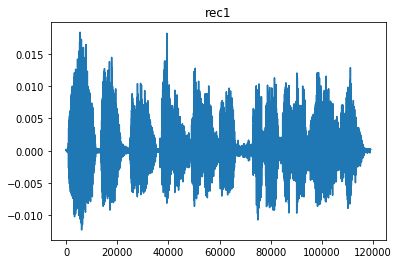

[ 0.00013654  0.00013607  0.00015191 ...,  0.00015472  0.0001445
  0.00016701]


In [9]:
plt.figure(3)
plt.plot(S_.T[0])
plt.title("rec1")
plt.show()
print(S_.T[0])

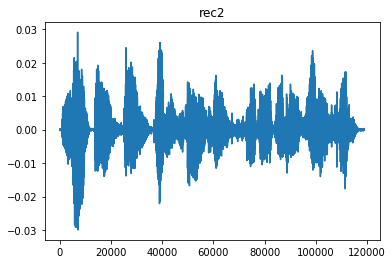

[  4.78447249e-05  -1.05666282e-06   3.10870444e-06 ...,  -1.05629543e-04
  -1.28914861e-04  -1.41418359e-04]


In [10]:
plt.figure(4)
plt.plot(S_.T[1])
plt.title("rec2")
plt.show()
print(S_.T[1])

In [11]:
scipy.io.wavfile.write(resultFilesPrefix+"1.wav",16000,S_.T[0])

In [12]:
scipy.io.wavfile.write(resultFilesPrefix+"2.wav",16000,S_.T[1])